# 데이터 전처리 연습
   - 결측값 확인 -> 처리(삭제, 대체)
   - 중복 데이터 제거
   - 데이터 변환
   - 이상값 처리
  
  https://www.kaggle.com/datasets/zhijinzhai/loandata

  | 필드             | 설명                                                                                           |
|-----------------|------------------------------------------------------------------------------------------------|
| Loan_id         | 대출 번호                                                            |
| Loan_status     | 대출 상태 (PAIDOFF: 기간 내 상환, COLLECTION: 연체 중, COLLECTION_PAIDOFF: 만기 후 상환)    |
| Principal       | 대출 금액                                                                    |
| terms           | 1주일, 격주, 한달 단위의 상환 기간                                                                |
| Effective_date  | 대출 시작 날짜                                   |
| Due_date        | 대출 만기 날짜                                          |
| Paidoff_time    | 대출금을 상환한 시간                                                                  |
| Pastdue_days    | 연체 일수                                                                               |
| Age, education, gender | 고객의 기본 인구통계 정보                                                                       |


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# 한글 폰트 인식 - Windows
import matplotlib 
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

# 마이너스 부호 인식
matplotlib.rc("axes", unicode_minus = False)

In [2]:
df = pd.read_csv("loan_payments_data.csv")
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 16:01,NaN,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,9/25/2016 13:00,NaN,33,High School or Below,male
2,xqd20160329,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,24,High School or Below,female
3,xqd20160179,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 9:00,NaN,21,High School or Below,male
4,xqd20160454,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 11:04,3.0,26,High School or Below,male


## 1. 결측값 확인 및 처리
 - pd.isnull, pd.dropna, pd.fillna

In [3]:
# 결측값 존재 유무 확인
df.isnull()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
498,False,False,False,False,False,False,False,True,False,False,False
499,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False,True,False,False,False
501,False,False,False,False,False,False,False,True,False,False,False


In [4]:
# 결측값 개수 확인
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     303
age                 0
education           0
Gender              0
dtype: int64

In [5]:
# 결측값 제거(row)
df.dropna()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
4,xqd20160454,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 11:04,3.0,26,High School or Below,male
5,xqd20320403,COLLECTION_PAIDOFF,1000,30,9/9/2016,11/7/2016,11/20/2016 14:10,13.0,39,college,male
6,xqd20160442,COLLECTION_PAIDOFF,1000,15,9/11/2016,9/25/2016,9/27/2016 16:35,2.0,28,college,male
9,xqd20160488,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/13/2016 12:02,2.0,35,Bechalor,male
21,xqd20160411,COLLECTION_PAIDOFF,800,15,9/10/2016,10/9/2016,10/10/2016 15:18,1.0,27,college,female
...,...,...,...,...,...,...,...,...,...,...,...
487,xqd20160417,COLLECTION_PAIDOFF,1000,30,9/11/2016,10/10/2016,10/11/2016 12:45,1.0,21,college,female
488,xqd20160458,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/30/2016 14:19,19.0,24,college,male
494,xqd20190405,COLLECTION_PAIDOFF,800,15,9/9/2016,9/23/2016,9/26/2016 17:22,3.0,33,High School or Below,male
499,xqd20160410,COLLECTION_PAIDOFF,1000,15,9/10/2016,9/24/2016,9/29/2016 10:30,5.0,32,Bechalor,male


In [6]:
df.dropna(axis=1)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
2,xqd20160329,COLLECTION,1000,30,9/11/2016,10/10/2016,24,High School or Below,female
3,xqd20160179,PAIDOFF,1000,30,9/12/2016,10/11/2016,21,High School or Below,male
4,xqd20160454,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,26,High School or Below,male
...,...,...,...,...,...,...,...,...,...
498,xqd20160104,PAIDOFF,1000,15,9/11/2016,9/25/2016,45,High School or Below,male
499,xqd20160410,COLLECTION_PAIDOFF,1000,15,9/10/2016,9/24/2016,32,Bechalor,male
500,xqd20160076,PAIDOFF,1000,30,9/11/2016,10/10/2016,30,High School or Below,male
501,xqd20160282,PAIDOFF,1000,15,9/14/2016,9/28/2016,28,Bechalor,male


In [7]:
# 특정 열의 결측값만 처리
df.dropna(axis = 0, subset = ['paid_off_time'])

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 16:01,NaN,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,9/25/2016 13:00,NaN,33,High School or Below,male
3,xqd20160179,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 9:00,NaN,21,High School or Below,male
4,xqd20160454,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 11:04,3.0,26,High School or Below,male
5,xqd20320403,COLLECTION_PAIDOFF,1000,30,9/9/2016,11/7/2016,11/20/2016 14:10,13.0,39,college,male
...,...,...,...,...,...,...,...,...,...,...,...
498,xqd20160104,PAIDOFF,1000,15,9/11/2016,9/25/2016,9/25/2016 23:48,NaN,45,High School or Below,male
499,xqd20160410,COLLECTION_PAIDOFF,1000,15,9/10/2016,9/24/2016,9/29/2016 10:30,5.0,32,Bechalor,male
500,xqd20160076,PAIDOFF,1000,30,9/11/2016,10/10/2016,10/8/2016 13:12,NaN,30,High School or Below,male
501,xqd20160282,PAIDOFF,1000,15,9/14/2016,9/28/2016,9/28/2016 9:00,NaN,28,Bechalor,male


In [8]:
# 결측값을 특정 값으로 대체
df.fillna(-99)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 16:01,-99.0,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,9/25/2016 13:00,-99.0,33,High School or Below,male
2,xqd20160329,COLLECTION,1000,30,9/11/2016,10/10/2016,-99,59.0,24,High School or Below,female
3,xqd20160179,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 9:00,-99.0,21,High School or Below,male
4,xqd20160454,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 11:04,3.0,26,High School or Below,male
...,...,...,...,...,...,...,...,...,...,...,...
498,xqd20160104,PAIDOFF,1000,15,9/11/2016,9/25/2016,9/25/2016 23:48,-99.0,45,High School or Below,male
499,xqd20160410,COLLECTION_PAIDOFF,1000,15,9/10/2016,9/24/2016,9/29/2016 10:30,5.0,32,Bechalor,male
500,xqd20160076,PAIDOFF,1000,30,9/11/2016,10/10/2016,10/8/2016 13:12,-99.0,30,High School or Below,male
501,xqd20160282,PAIDOFF,1000,15,9/14/2016,9/28/2016,9/28/2016 9:00,-99.0,28,Bechalor,male


In [9]:
# past_due_days 열의 결측값을 평균값으로 대체 (이때 평균에 결측값은 포함하지 않음)
df['past_due_days'].fillna(df['past_due_days'].mean())

0      36.01
1      36.01
2      59.00
3      36.01
4       3.00
       ...  
498    36.01
499     5.00
500    36.01
501    36.01
502     1.00
Name: past_due_days, Length: 503, dtype: float64

In [10]:
# past_due_days 열의 결측값을 중앙값으로 대체
df['past_due_days'].fillna(df['past_due_days'].median())


0      37.0
1      37.0
2      59.0
3      37.0
4       3.0
       ... 
498    37.0
499     5.0
500    37.0
501    37.0
502     1.0
Name: past_due_days, Length: 503, dtype: float64

### [결측값 처리] paid_off_time (실제 대출금 상환 시간)
이 열의 결측치는 대출이 아직 상환되지 않았거나 기록되지 않았다는 것을 의미할 수 있습니다. 대출 상태(loan_status)를 참고하여 결측치를 처리할 수 있습니다.

- PAIDOFF(기간 내 상환) 또는 COLLECTION_PAIDOFF(만기 후 상환)인 경우 결측치가 있는 것은 데이터 오류일 수 있으므로 이를 확인하거나 해당 행 데이터를 제거합니다.
- COLLECTION(연체 중)인 경우에는 상환이 이루어지기 전이므로 결측치는 정상 데이터라고 볼 수 있습니다. 

In [11]:
# 결측값이 있는 행만 추출
df[(df['paid_off_time'].isnull())]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
2,xqd20160329,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,24,High School or Below,female
7,xqd20160367,COLLECTION,800,30,9/11/2016,10/10/2016,NaN,59.0,33,High School or Below,male
10,xqd20160324,COLLECTION,800,15,9/10/2016,9/24/2016,NaN,75.0,32,college,male
13,xqd20160382,COLLECTION,800,15,9/11/2016,9/25/2016,NaN,74.0,35,High School or Below,male
16,xqd20160350,COLLECTION,800,15,9/11/2016,9/25/2016,NaN,74.0,29,college,male
...,...,...,...,...,...,...,...,...,...,...,...
468,xqd20160342,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,college,male
476,xqd20160358,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,26,Bechalor,male
479,xqd20160336,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,34,High School or Below,male
490,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male


In [12]:
# 대출 상태가 PAIDOFF, COLLECTION_PAIDOFF인데 paid_off_time이 결측값인 경우
df[(df['paid_off_time'].isnull()) & (df['loan_status'].isin(['PAIDOFF', 'COLLECTION_PAIDOFF']))]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender


In [13]:
# 대출 상태가 COLLECTION인데 past_due_days가 결측값인 경우
df[(df['paid_off_time'].isnull()) & (df['loan_status'] == 'COLLECTION')]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
2,xqd20160329,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,24,High School or Below,female
7,xqd20160367,COLLECTION,800,30,9/11/2016,10/10/2016,NaN,59.0,33,High School or Below,male
10,xqd20160324,COLLECTION,800,15,9/10/2016,9/24/2016,NaN,75.0,32,college,male
13,xqd20160382,COLLECTION,800,15,9/11/2016,9/25/2016,NaN,74.0,35,High School or Below,male
16,xqd20160350,COLLECTION,800,15,9/11/2016,9/25/2016,NaN,74.0,29,college,male
...,...,...,...,...,...,...,...,...,...,...,...
468,xqd20160342,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,25,college,male
476,xqd20160358,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,26,Bechalor,male
479,xqd20160336,COLLECTION,1000,30,9/11/2016,10/10/2016,NaN,59.0,34,High School or Below,male
490,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male


### [결측값 처리] past_due_days (연체일수)

- 대출이 'PAIDOFF' 상태인 경우, 이 열의 결측치는 0으로 설정할 수 있습니다. 대출이 상환되었으므로 만기일 이후 지연된 날짜는 없습니다.
- 'COLLECTION' 또는 'COLLECTION_PAIDOFF' 상태에서 결측치가 있다면, due_date와 paid_off_time을 비교하여 지연된 일수를 계산할 수 있습니다. 

In [14]:
# PAIDOFF 데이터만 추출하고 past_due_days 열의 결측값을 확인
df.loc[df['loan_status'] == 'PAIDOFF', 'past_due_days'].isnull().sum()

np.int64(303)

In [15]:
df[df['loan_status'].str.match('PAIDOFF') & df['past_due_days'].isnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 16:01,NaN,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,9/25/2016 13:00,NaN,33,High School or Below,male
3,xqd20160179,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/11/2016 9:00,NaN,21,High School or Below,male
8,xqd20160089,PAIDOFF,800,15,9/11/2016,9/25/2016,9/21/2016 9:35,NaN,43,Bechalor,male
11,xqd20160023,PAIDOFF,1000,30,9/10/2016,10/9/2016,10/9/2016 23:00,NaN,25,High School or Below,male
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd28160164,PAIDOFF,1000,15,9/12/2016,9/26/2016,9/26/2016 9:00,NaN,27,college,female
496,xqd20160213,PAIDOFF,1000,30,9/12/2016,10/11/2016,10/10/2016 16:41,NaN,33,High School or Below,female
498,xqd20160104,PAIDOFF,1000,15,9/11/2016,9/25/2016,9/25/2016 23:48,NaN,45,High School or Below,male
500,xqd20160076,PAIDOFF,1000,30,9/11/2016,10/10/2016,10/8/2016 13:12,NaN,30,High School or Below,male


In [16]:
# PAIDOFF 데이터만 추출하고 past_due_days 열의 결측값을 0으로 대체
df.loc[df['loan_status'] == 'PAIDOFF', 'past_due_days'] = 0
df.loc[df['loan_status'] == 'PAIDOFF', 'past_due_days'].isnull().sum()

np.int64(0)

In [17]:
# 'COLLECTION' 또는 'COLLECTION_PAIDOFF' 상태에서 결측치가 있다면, due_date와 paid_off_time을 비교하여 지연된 일수를 계산할 수 있습니다.
df.loc[df['loan_status'].isin(['COLLECTION', 'COLLECTION_PAIDOFF']), 'past_due_days'].isnull().sum() 

np.int64(0)

### past_due_days (연체일수) 검증

- due_date와 paid_off_time을 비교하여 지연된 일수를 계산할 수 있습니다. 
- 이 값을 past_due_days (연체일수)와 비교하여 데이터 오류를 검증할 수 있습니다. 

In [18]:
# due_date와 paid_off_time을 비교하여 지연된 일수를 계산
(pd.to_datetime(df['paid_off_time']) - pd.to_datetime(df['due_date'])).dt.days

0      0.0
1      0.0
2      NaN
3      0.0
4      3.0
      ... 
498    0.0
499    5.0
500   -2.0
501    0.0
502    1.0
Length: 503, dtype: float64

In [19]:
# past_due_days 가 음수인 경우 0으로 대체 (만기 전에 조기상환한 경우) -> 음수값이 존재하지 않음
df.loc[(pd.to_datetime(df['paid_off_time']) - pd.to_datetime(df['due_date'])).dt.days < 0, 'past_due_days'].unique() 

array([0.])

In [20]:
# paid_off_time 열의 결측값의 개수를 확인
df['paid_off_time'].isnull().sum()

np.int64(100)

In [21]:
# past_due_days 열의 결측값의 개수를 확인
df['past_due_days'].isnull().sum()

np.int64(0)

In [22]:
# paid_off_time 열을 분석에서 제외
df = df.drop('paid_off_time', axis = 1)
df.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,0.0,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,0.0,33,High School or Below,male


## 2. 중복 데이터 제거
 - df.duplicated
 - df.drop_duplicates
 

In [23]:
# 중복값 확인
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
498    False
499    False
500    False
501    False
502    False
Length: 503, dtype: bool

In [24]:
# 중복값 개수 확인
df.duplicated().sum()

np.int64(3)

In [25]:
# 중복값 출력
df[df.duplicated()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
117,xqd20160101,PAIDOFF,1000,7,9/11/2016,9/17/2016,0.0,29,High School or Below,male
332,xqd20160201,PAIDOFF,1000,15,9/12/2016,9/26/2016,0.0,30,college,male
361,xqd20160101,PAIDOFF,1000,7,9/11/2016,9/17/2016,0.0,29,High School or Below,male


In [26]:
# 중복값 확인 (모든 해당하는 행을 출력)
df[df.duplicated(keep = False)]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
77,xqd20160101,PAIDOFF,1000,7,9/11/2016,9/17/2016,0.0,29,High School or Below,male
117,xqd20160101,PAIDOFF,1000,7,9/11/2016,9/17/2016,0.0,29,High School or Below,male
279,xqd20160201,PAIDOFF,1000,15,9/12/2016,9/26/2016,0.0,30,college,male
332,xqd20160201,PAIDOFF,1000,15,9/12/2016,9/26/2016,0.0,30,college,male
361,xqd20160101,PAIDOFF,1000,7,9/11/2016,9/17/2016,0.0,29,High School or Below,male


In [27]:
# 중복값 제거
df.drop_duplicates()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
0,xqd20160234,PAIDOFF,1000,30,9/12/2016,10/11/2016,0.0,36,High School or Below,male
1,xqd20160038,PAIDOFF,700,15,9/11/2016,9/25/2016,0.0,33,High School or Below,male
2,xqd20160329,COLLECTION,1000,30,9/11/2016,10/10/2016,59.0,24,High School or Below,female
3,xqd20160179,PAIDOFF,1000,30,9/12/2016,10/11/2016,0.0,21,High School or Below,male
4,xqd20160454,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,3.0,26,High School or Below,male
...,...,...,...,...,...,...,...,...,...,...
498,xqd20160104,PAIDOFF,1000,15,9/11/2016,9/25/2016,0.0,45,High School or Below,male
499,xqd20160410,COLLECTION_PAIDOFF,1000,15,9/10/2016,9/24/2016,5.0,32,Bechalor,male
500,xqd20160076,PAIDOFF,1000,30,9/11/2016,10/10/2016,0.0,30,High School or Below,male
501,xqd20160282,PAIDOFF,1000,15,9/14/2016,9/28/2016,0.0,28,Bechalor,male


In [28]:
# 중복값을 제거한 후, 다시 중복값이 있는지 확인
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## 3. 데이터 변환
 - 데이터 자료형을 적절한 형태로 변환
 - 하나의 열이 여러 개의 정보를 가지고 있을 경우 열을 분리
 - 특정 데이터의 편향도가 클 경우 데이터 분포를 정규 분포로 변형

In [29]:
# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 502
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   past_due_days   500 non-null    float64
 7   age             500 non-null    int64  
 8   education       500 non-null    object 
 9   Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 43.0+ KB


### 날짜형식 데이터 자료형 변환

In [30]:
# effective_date와 due_date 열을 날짜 형식으로 변환
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

# 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 502
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   past_due_days   500 non-null    float64       
 7   age             500 non-null    int64         
 8   education       500 non-null    object        
 9   Gender          500 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 43.0+ KB


In [31]:
# effective_date와 due_date 열의 날짜 형식을 확인
df[['effective_date', 'due_date']].head()

,effective_date,due_date
0,2016-09-12,2016-10-11
1,2016-09-11,2016-09-25
2,2016-09-11,2016-10-10
3,2016-09-12,2016-10-11
4,2016-09-12,2016-10-11


### 대출기간 데이터를 생성

In [32]:
# effective_date와 due_date의 차이를 계산하여 loan_duration 열을 생성
df['loan_duration'] = (df['due_date'] - df['effective_date']).dt.days + 1

# loan_duration 열을 확인
df[['effective_date', 'due_date', 'loan_duration', 'terms']].head()

,effective_date,due_date,loan_duration,terms
0,2016-09-12,2016-10-11,30,30
1,2016-09-11,2016-09-25,15,15
2,2016-09-11,2016-10-10,30,30
3,2016-09-12,2016-10-11,30,30
4,2016-09-12,2016-10-11,30,30


In [33]:
# loan_duration이 terms와 일치하는지 확인
df['check_duration'] = df['loan_duration'] == df['terms']
df['check_duration'].value_counts()

check_duration
True     458
False     42
Name: count, dtype: int64

In [34]:
# loan_duration이 terms와 일치하지 않는 데이터 확인 -> 만기 연장을 한 경우로 추정
df[df['check_duration'] == False]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender,loan_duration,check_duration
5,xqd20320403,COLLECTION_PAIDOFF,1000,30,2016-09-09,2016-11-07,13.0,39,college,male,60,False
18,xqd20160112,PAIDOFF,1000,30,2016-09-11,2016-11-09,0.0,27,college,female,60,False
20,xqd20160012,PAIDOFF,1000,15,2016-09-10,2016-10-09,0.0,39,High School or Below,male,30,False
21,xqd20160411,COLLECTION_PAIDOFF,800,15,2016-09-10,2016-10-09,1.0,27,college,female,30,False
33,xqd20160347,COLLECTION,1000,30,2016-09-11,2016-11-09,29.0,31,High School or Below,male,60,False
41,xqd20160147,PAIDOFF,1000,30,2016-09-11,2016-11-09,0.0,26,college,female,60,False
47,xqd20160465,COLLECTION_PAIDOFF,1000,30,2016-09-12,2016-11-10,1.0,42,High School or Below,female,60,False
48,xqd20160123,PAIDOFF,1000,15,2016-09-11,2016-10-25,0.0,20,college,male,45,False
71,xqd20160316,COLLECTION,1000,15,2016-09-10,2016-10-09,60.0,26,High School or Below,male,30,False
73,xqd20160307,COLLECTION,800,15,2016-09-10,2016-10-09,60.0,28,college,male,30,False


### 날짜, 시간 속성을 추출하여 변수화

In [35]:
# 날짜 데이터를 기준으로 분석하기 위해 월, 일, 요일, 시간 등의 정보를 추출
df['effective_month'] = df['effective_date'].dt.month
df['effective_day'] = df['effective_date'].dt.day
df['effective_weekday'] = df['effective_date'].dt.weekday

df[['effective_date', 'effective_month', 'effective_day', 'effective_weekday']].head()

,effective_date,effective_month,effective_day,effective_weekday
0,2016-09-12,9,12,0
1,2016-09-11,9,11,6
2,2016-09-11,9,11,6
3,2016-09-12,9,12,0
4,2016-09-12,9,12,0


### weekday 열의 숫자(0-6)를 월-일 형식으로 변환 

In [36]:
# map 함수를 사용하여 요일을 문자형으로 변환
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}

df['effective_weekday'].map(weekday_map)

0      월
1      일
2      일
3      월
4      월
      ..
498    일
499    토
500    일
501    수
502    월
Name: effective_weekday, Length: 500, dtype: object

In [37]:
# apply 함수를 사용하여 요일을 문자형으로 변환

df['effective_weekday'].apply(lambda x: weekday_map[x])

0      월
1      일
2      일
3      월
4      월
      ..
498    일
499    토
500    일
501    수
502    월
Name: effective_weekday, Length: 500, dtype: object

### 범주형 데이터 인코딩
'education', 'Gender' 등의 범주형 데이터를 수치형 데이터로 인코딩

In [38]:
# education 열의 고유값 확인
df['education'].value_counts()

education
college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: count, dtype: int64

In [39]:
### 원-핫 인코딩 (One-Hot Encoding):  
# 각 범주를 새로운 이진 열로 변환. 이 방법은 각 범주 간의 순서가 없을 때 유용
df_onehot = pd.get_dummies(df[['education']], columns = ['education'], drop_first = True)
df_onehot

,education_High School or Below,education_Master or Above,education_college
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
498,True,False,False
499,False,False,False
500,True,False,False
501,False,False,False


In [40]:
### 레이블 인코딩 (Label Encoding): 각 범주를 숫자 값으로 변환. 순서가 의미가 있을 때 사용

# Gender 열의 고유값 확인
df['Gender'].value_counts()

Gender
male      423
female     77
Name: count, dtype: int64

In [41]:
# map 함수를 사용하여 인코딩
df['Gender'].map({'male':0, 'female':1})

0      0
1      0
2      1
3      0
4      0
      ..
498    0
499    0
500    0
501    0
502    0
Name: Gender, Length: 500, dtype: int64

## 4. 이상값 처리

 - 특정 열의 데이터가 정상 분포를 벗어나는 경우, 이상 값으로 간주할 수 있음
 - 극단적으로 크거나 작은 값은 제거

<Axes: >

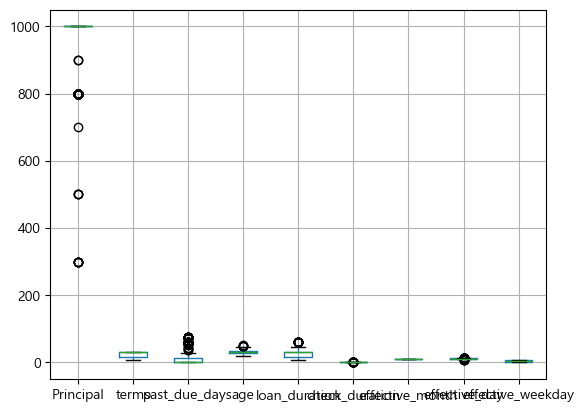

In [42]:
df.boxplot()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 502
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Loan_ID            500 non-null    object        
 1   loan_status        500 non-null    object        
 2   Principal          500 non-null    int64         
 3   terms              500 non-null    int64         
 4   effective_date     500 non-null    datetime64[ns]
 5   due_date           500 non-null    datetime64[ns]
 6   past_due_days      500 non-null    float64       
 7   age                500 non-null    int64         
 8   education          500 non-null    object        
 9   Gender             500 non-null    object        
 10  loan_duration      500 non-null    int64         
 11  check_duration     500 non-null    bool          
 12  effective_month    500 non-null    int32         
 13  effective_day      500 non-null    int32         
 14  effective_weekd

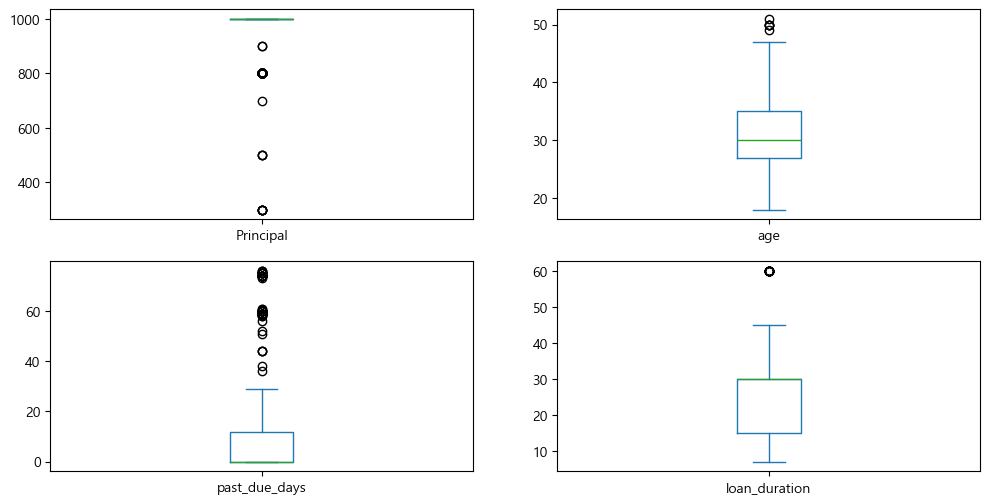

In [44]:
# 수치형 데이터의 분포 확인을 위한 박스 플롯 생성
numeric_columns = ['Principal', 'age', 'past_due_days', 'loan_duration']
df[numeric_columns].plot(kind='box', subplots=True, layout=(2,2), figsize=(12, 6))
plt.show()

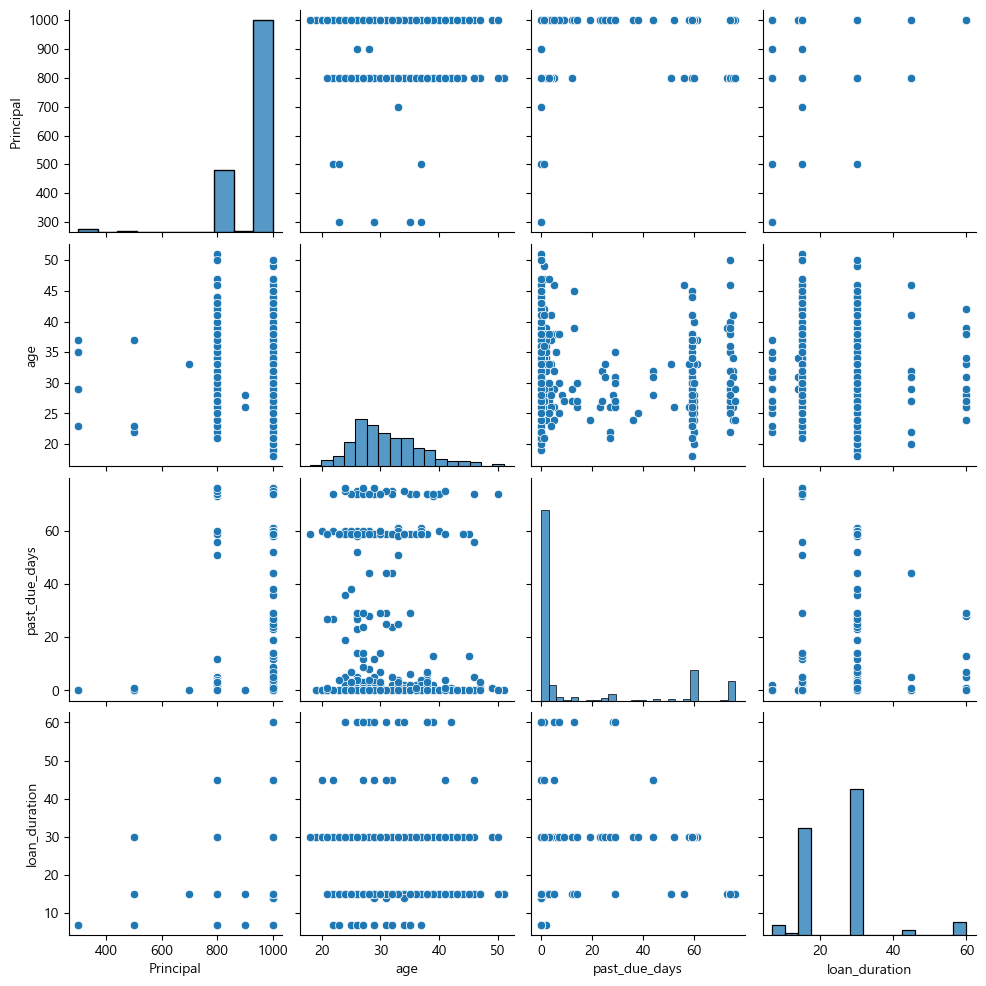

In [45]:
# 수치형 데이터의 분포 확인을 위한 pairplot 생성
sns.pairplot(df[numeric_columns])
plt.show()

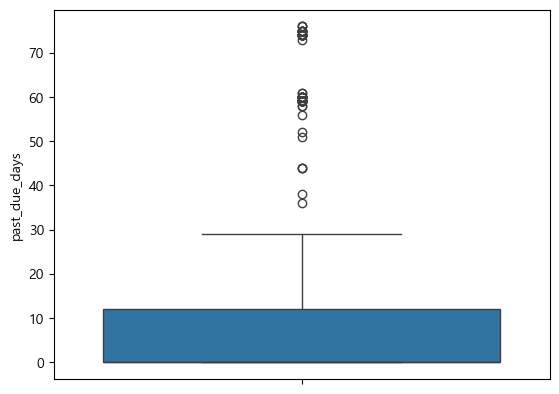

In [46]:
# past_due_days 열의 분포 확인
sns.boxplot(df['past_due_days'])
plt.show()

In [47]:
# past_due_days 값이 30 이상인 데이터를 제거
df = df[df['past_due_days'] <= 30]

df['past_due_days'].describe()

count    399.000000
mean       1.962406
std        5.815513
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       29.000000
Name: past_due_days, dtype: float64

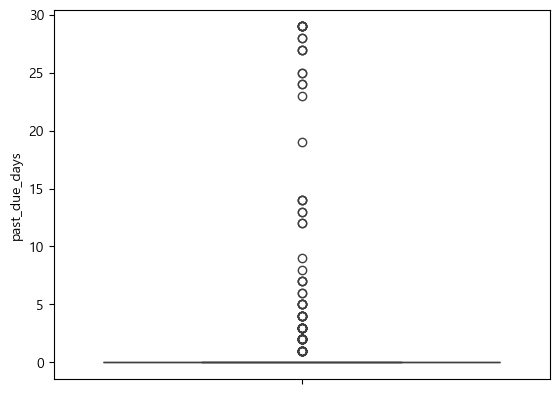

In [48]:
# past_due_days 열의 분포 확인
sns.boxplot(df['past_due_days'])
plt.show()

## 실습 : 각자 필요한 전처리 작업을 수행하고 그 결과를 CSV 파일로 저장

In [ ]:
# 이 부분에서 필요한 작업을 처리합니다. 




In [45]:
# csv 파일로 저장
# df.to_csv("loan_data_preprocessed.csv", index = False)